# [Chapter 5](https://pressbooks.bccampus.ca/thermo1/chapter/5-0-chapter-introduction-and-learning-objectives/)

## Question #14: Feedwater Heater 

a) Consider a steam cycle where water is pumped from room its satuated liquid state at atmospheric pressure ($P_1=101\:kPa$) iseontropically to $P_2=1\:MPa$. Water then is heated in a bolier in a constant pressure to a maximum temperature of $T_3=600\:^{\circ}C$ which is limited by the metallurgical consederations of the turbine. Steam then is expanded iseontrepically in the turbine before entering the constant-pressure condenser. Calculate the efficiency of the cycle.

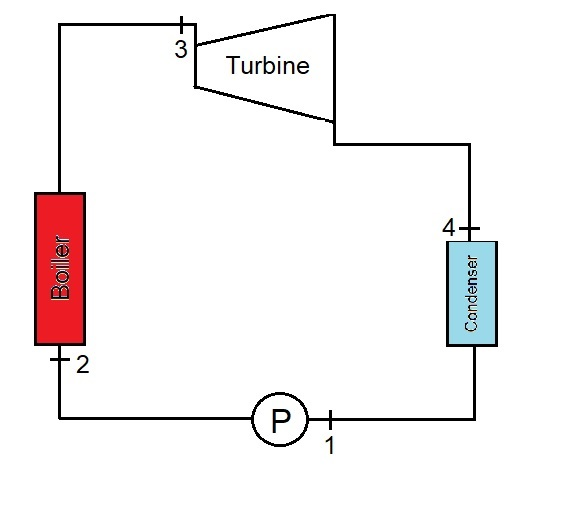

b) To increase the efficiency of the cycle, a feed-water heater is prposed where steam at a medium pressure of $P_6=500\:kPa$ is extracted from the turbine and is mixed in a feed-water heater with the pumped water before being pumped again to the maximum pressure $P_4=1\:MPa$. Assuming water is at its saturated liquid state before entering pumps, calculate the efficiency of the system.

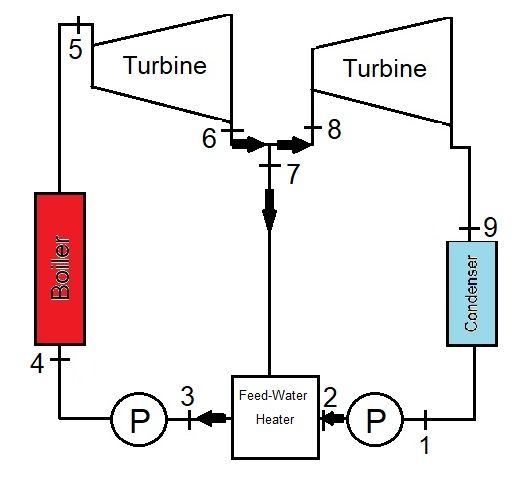

c) optimize the medium pressure to maximize the efficiency

### Solution Approach for a)

The pump is iseotropic, therefore

$s_2 = s_1$

which is used to calculate ethalpy at the second state ($h_2$)

and for the turbine again,

$s_4=s_3$

which is used to calculate the enthalpy at state #4 ($h_4$)

the efficiency is calculated by

$\eta=w/q_H=(w_{turbine}-w_{pump})/q_H$

where for work from the turbine

$w_{turbine}=h_3-h_4$

and

$w_{pump}=h_2-h_1$

and from the boiler

$q_H=h_3-h_2$

In [5]:
#importing the required library
import CoolProp.CoolProp as CP
fluid = 'water'
P_1 = 101E+3   #P1 in Pa
s_1 = CP.PropsSI("S", "P", P_1, "Q", 0 , fluid)   #entropy in state#1 in J/kg.K
h_1 = CP.PropsSI("H", "P", P_1, "Q", 0 , fluid)   #enthalpy in state#1 in J/kg

s_2 = s_1   #iseontropic pump
P_2 = 1E+6   #pressure in state #2 in Pa
h_2 = CP.PropsSI("H", "P", P_2, "S", s_2 , fluid)   #enthalpy in state#2 in J/kg

P_3 = P_2   #constant pressure boiler
T_3 = 600 + 273.15   #temperature at state #3 in K
s_3 = CP.PropsSI("S", "P", P_3, "T", T_3 , fluid)   #entropy in state#3 in J/kg.K
h_3 = CP.PropsSI("H", "P", P_3, "T", T_3 , fluid)   #enthalpy in state#3 in J/kg

s_4 = s_3   #iseontropic turbine
P_4 = P_1   #constant pressure condenser
h_4 = CP.PropsSI("H", "P", P_4, "S", s_4 , fluid)   #enthalpy in state#4 in J/kg

w_turbine = h_3 - h_4   #work output from turbine in J/kg
w_pump = h_2 - h_1   #work output in pump in J/kg
w = w_turbine - w_pump   #net work output in J/kg

q_H = h_3 - h_2   #heat input in boiler in J/kg

etha = w / q_H   #overall efficiency of the cycle

print('Theefficiency of the cycle is:', f"{etha*100:.1f}", '%')

Theefficiency of the cycle is: 22.0 %


### Solution Approach for b)

The pumps are iseotropic, therefore

$s_2 = s_1$\

$s_4 = s_3$

which are used to calculate ethalpy at the states after being pumped ($h_2$ and $h_4$)

Additionally, mixing happens at a constant medium pressure, therefore

$P_6=500\:kPa=P_7=P_8=P_2=P_3$

In [7]:
#importing the required library
import CoolProp.CoolProp as CP
fluid = 'water'

#pressure distribution
P_4 = 1E+6 #pressure in state #4 in Pa
P_6 = 500E+3 #medium extraction pressure in Pa
P_1 = 101E+3   #P1 in Pa

#first pump
s_1 = CP.PropsSI("S", "P", P_1, "Q", 0 , fluid)   #entropy in state#1 in J/kg.K
h_1 = CP.PropsSI("H", "P", P_1, "Q", 0 , fluid)   #enthalpy in state#1 in J/kg

s_2 = s_1   #iseontropic pump
P_2 = P_6   #pressure in state #2 in Pa
h_2 = CP.PropsSI("H", "P", P_2, "S", s_2 , fluid)   #enthalpy in state#2 in J/kg

#second Pump
P_3 = P_2   #P3 in Pa
s_3 = CP.PropsSI("S", "P", P_3, "Q", 0 , fluid)   #entropy in state#3 in J/kg.K
h_3 = CP.PropsSI("H", "P", P_3, "Q", 0 , fluid)   #enthalpy in state#3 in J/kg

s_4 = s_3   #iseontropic pump
h_4 = CP.PropsSI("H", "P", P_4, "S", s_4 , fluid)   #enthalpy in state#4 in J/kg

#first turbine
P_5 = P_4   #constant pressure boiler
T_5 = 600 + 273.15   #temperature at state #3 in K
s_5 = CP.PropsSI("S", "P", P_5, "T", T_5 , fluid)   #entropy in state#5 in J/kg.K
h_5 = CP.PropsSI("H", "P", P_5, "T", T_5 , fluid)   #enthalpy in state#5 in J/kg

s_6 = s_5   #iseontropic turbine
h_6 = CP.PropsSI("H", "P", P_6, "S", s_6 , fluid)   #enthalpy in state#6 in J/kg

#second turbine
h_8 = h_6   #constant enthalpy flow extraction
P_8 = P_6   
s_8 = s_6

s_9 = s_8   #iseontropic turbine
P_9 = P_1   #constaht pressure condenser
h_9 = CP.PropsSI("H", "P", P_9, "S", s_9 , fluid)   #enthalpy in state#9 in J/kg

Assuming unit mass flow-rate through the boiler ($\dot m_4=1\:kg/s$) and an extracted flow rate of ($\dot m_7=x\:kg/s$), 

the mass balance for steam extraction:

$\dot m_6=\dot m_7+\dot m_8$

and 

$\dot m_6=\dot m_4=1\:kg/s$

therefore

$1=x+\dot m_8$

therefore

$\dot m_8=\dot m_9=\dot m_1=\dot m_2=1-x$

Applying the first law to the feed-water heater,

$\dot m_{in}h_{in}=\dot m_{out}h_{out}$

$xh_7+(1-x)h_2=h_3$

therefore

$x=(h_3-h_2)/(h_7-h_2)$

In [12]:
h_7 = h_6   #constant enthalpy flow extraction

x = (h_3-h_2)/(h_7-h_2)   #extracted portion of steam

w_turbine1 = h_5 - h_6   #work output from turbine before flow extraction in W
w_turbine2 = (1 - x) * (h_8 - h_9)   #work output from turbine after flow extraction in W
w_turbine = w_turbine1 + w_turbine2   #work output from turbines in W

w_pump1 = (1 - x) * (h_2 - h_1)   #work input in pump before mixing in W
w_pump2 = h_4 - h_3   #work input in pump after mixing in W
w_pump = w_pump1 + w_pump2   #work output in pumps in W

w = w_turbine - w_pump   #net work output in W

q_H = h_5 - h_4   #heat input in boiler in W

etha = w / q_H   #overall efficiency of the cycle
print('Theefficiency of the cycle with feedwater heater is:', f"{etha*100:.1f}", '%')

Theefficiency of the cycle with feedwater heater is: 22.5 %


### Solution Approach for c)

Text(0.5, 0, 'Medium Pressure [kPa]')

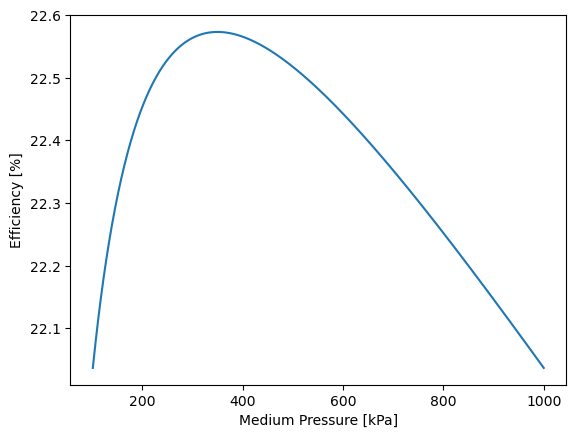

In [14]:
import numpy as np
import matplotlib.pyplot as plt

P_vals = np.linspace(P_1, P_4, 1000)   #an array of pressures between two ends in Pa
etha = np.zeros(1000)   #empty array to store efficiency values

i = 0   #counter for the for loop
for P_6 in P_vals:

    #pressure distribution
    P_4 = 1E+6 #pressure in state #4 in Pa
    P_1 = 101E+3   #P1 in Pa

    #first pump
    s_1 = CP.PropsSI("S", "P", P_1, "Q", 0 , fluid)   #entropy in state#1 in J/kg.K
    h_1 = CP.PropsSI("H", "P", P_1, "Q", 0 , fluid)   #enthalpy in state#1 in J/kg

    s_2 = s_1   #iseontropic pump
    P_2 = P_6   #pressure in state #2 in Pa
    h_2 = CP.PropsSI("H", "P", P_2, "S", s_2 , fluid)   #enthalpy in state#2 in J/kg

    #second Pump
    P_3 = P_2   #P3 in Pa
    s_3 = CP.PropsSI("S", "P", P_3, "Q", 0 , fluid)   #entropy in state#3 in J/kg.K
    h_3 = CP.PropsSI("H", "P", P_3, "Q", 0 , fluid)   #enthalpy in state#3 in J/kg

    s_4 = s_3   #iseontropic pump
    h_4 = CP.PropsSI("H", "P", P_4, "S", s_4 , fluid)   #enthalpy in state#4 in J/kg

    #first turbine
    P_5 = P_4   #constant pressure boiler
    T_5 = 600 + 273.15   #temperature at state #3 in K
    s_5 = CP.PropsSI("S", "P", P_5, "T", T_5 , fluid)   #entropy in state#5 in J/kg.K
    h_5 = CP.PropsSI("H", "P", P_5, "T", T_5 , fluid)   #enthalpy in state#5 in J/kg

    s_6 = s_5   #iseontropic turbine
    h_6 = CP.PropsSI("H", "P", P_6, "S", s_6 , fluid)   #enthalpy in state#6 in J/kg

    #second turbine
    h_8 = h_6   #constant enthalpy flow extraction
    P_8 = P_6   
    s_8 = s_6

    s_9 = s_8   #iseontropic turbine
    P_9 = P_1   #constaht pressure condenser
    h_9 = CP.PropsSI("H", "P", P_9, "S", s_9 , fluid)   #enthalpy in state#9 in J/kg

    h_7 = h_6   #constant enthalpy flow extraction

    x = (h_3-h_2)/(h_7-h_2)   #extracted portion of steam

    w_turbine1 = h_5 - h_6   #work output from turbine before flow extraction in W
    w_turbine2 = (1 - x) * (h_8 - h_9)   #work output from turbine after flow extraction in W
    w_turbine = w_turbine1 + w_turbine2   #work output from turbines in W

    w_pump1 = (1 - x) * (h_2 - h_1)   #work input in pump before mixing in W
    w_pump2 = h_4 - h_3   #work input in pump after mixing in W
    w_pump = w_pump1 + w_pump2   #work output in pumps in W

    w = w_turbine - w_pump   #net work output in W

    q_H = h_5 - h_4   #heat input in boiler in W

    etha[i] = w / q_H #overall efficiency of the cycle
    i = i + 1


plt.plot(P_vals/1000,etha*100)
plt.ylabel("Efficiency [%]")  # give y axis a label
plt.xlabel("Medium Pressure [kPa]")  # give x axis a label